# The Discrete Fourier Transform

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 18**](worksheet18).

* The source code for this page is [dft/1/dft.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/dft/1/dft.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/dft/1/dft.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/dft/1/dft.pdf) file.

## Scope and Background Reading

The material in this presentation and notes is based on [Chapter 10](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=389) of  {cite}`karris` from the **Required Reading List**. Additional coverage is to be found in Chapter 12 of {cite}`phillips` from the **Recommended Reading List**.

## Agenda

* The discrete time fourier transform (DFT)

* Even and Odd Properties of the DFT

* Common Properties and Theorems of the DFT

* Sampling Theorem, Windows, and the Picket Fence Effect (Notes only)

## Introduction

* Fourier series: periodic and continuous time function leads to a non-periodic discrete frequency function.
* Fourier transform: non-periodic and continuous function leads to a non-periodic continuous frequency function.
* Z and inverse Z-transforms produce a periodic and continuous frequency function, since they are evaluated on the unit circle.

### Note

The frequency spectrum of a discrete time function $f[n]$ is obtained from its z-transform by substituting $z = e^{sT} = e^{j\omega T}$ as we saw from the mapping of the s-plane to the z-plane. This is continuous as there are an infinite number of points in the interval $0$ to $2\pi$; and it is periodic because for any point $\omega T$ there is an equivalent point $\omega T + 2 N \pi$ later. 

In practice, to compute the spectrum for a discrete time (DT) system, we only compute a finite number of equally spaced points.

For maxium readability, and because the exponent terms we will be using are fairly complex, we shall use the functional notation $\exp(x)$ rather than exponential notation $e^x$.

In this session, we will see that a periodic and discrete time function results in a periodic and discrete frequency function.

For convenience we summarize these facts in a table:

| **Topic** | **Time Function** | **Frequency Function** |
|-----------|-------------------|------------------------|
| Fourier Series | Continuous, Periodic | Discrete, Non-Periodic |
| Fourier Transform | Continuous, Non-Periodic | Continuous, Non-Periodic |
| Z Transform | Discrete, Non-Periodic | Continuous, Periodic |
| Discrete Fourier Transform | Discrete, Periodic | Discrete, Periodic |

### List of Abbreviations

* CT -- Continous Time
* DT -- Discrete Time
* DF - Discrete frequency
* DFT -- Discrete (Time) Fourier Transform
* FFT -- Fast Fourier Transform

### Notation

In the following we shall denote a DT signal as $x[n]$ and its discrete frequency function as $X[m]$.

## Z-Transform

Recall that

$$F(z) = \mathcal{Z} f[n] = \sum_{n=0}^{\infty} f[n]z^{-n}.$$

The value of this function on the unit circle in the Z-plane will be

$$F\left(\exp\left({j\omega T}\right)\right) = \sum_{n=0}^{\infty} f[n]\exp\left({-jn \omega T}\right).$$

This is an infinite sum.  So to compute it, we need to truncate it.

## The Discrete-time Fourier Transform

Let's assume that instead of an infinite number of points, we have $N$ points, equally distributed around the unit circle, then the truncated version will be:

$$X[m] =  \sum_{n=0}^{N-1} x[n]\exp\left({-j2\pi \frac{m n}{N}}\right)$$

where

$$\omega  = \left( {\frac{2\pi}{N}} \right)m$$

and $m = 0,1,2,\ldots, N-1$.

We refer to the equation 

$$X[m] =  \sum_{n=0}^{N-1} x[n]\exp\left({-j2\pi \frac{m n}{N}}\right)$$

as the N-point Discrete-time Fourier Transform (DFT) of $x[n]$.

The inverse DFT is defined as

$$x[n] =  \frac{1}{N} \sum_{m=0}^{N-1} X[m]\exp\left({j2\pi \frac{m n}{N}}\right)$$

for $n = 0,1,2,\ldots, N-1$.

Note the symmetry of the DFT and the Inverse DFT!

In general, the DFT is complex, and thus it can be expressed as

$$X[m] = \Re\left\{X[m]\right\} + \Im\left\{X[m]\right\}$$

for $m = 0,1,2,\ldots,N-1$.

Since

$$\exp\left({-j2\pi \frac{m n}{N}}\right) = \cos\left(2\pi\frac{m n}{N}\right) - j\sin\left(2\pi \frac{m n}{N}\right)$$

the DFT can be expresssed as

$$X[m] =  \sum_{n=0}^{N-1} x[n]\exp\left({-j2\pi \frac{m n}{N}}\right) = \sum_{n=0}^{N-1}x[n]\cos\left(2\pi \frac{m n}{N}\right) - j\sum_{n=0}^{N-1}x[n]\sin\left(2\pi\frac{ m n}{N}\right).$$

For $n=0$ this reduces to 

$$X[m] = x[0].$$

Then the real part of $X[m]$ is

$$\Re \left\{ {X[m]} \right\} = x[0] + \sum\limits_{n = 1}^{N - 1} x [n]\cos \left( 2\pi \frac{mn}{N} \right)\quad {\text{for}}\quad m = 0,1,2, \ldots ,N - 1$$

and the imaginary part is

$$
 \Im \left\{ {X[m]} \right\} = - \sum\limits_{n = 1}^{N - 1} x [n]\sin \left( 2\pi \frac{mn}{N} \right)\quad {\text{for}}\quad m = 0,1,2, \ldots ,N - 1.
$$

Note that the summations are from 1 to $N-1$ because $n=0$ is covered in the real term, and as $x[0]$ is real, it is zero in the corresponding imaginary term.

### In Class Example 1

A discrete time signal is defined by the sequence 

$x[0] = 1$, $x[1] = 2$, $x[2] = 2$, $x[3] = 1$. 

Compute the frequency components $X[m]$.

### Solution 1

Compute the $N=4$ point DFT for $\Re\left\{X[m]\right\}$.

$x[n] = \left[1, 2, 2, 1\right]$ and $N=4$.

$x[0]$:


$$
\begin{eqnarray*}
\Re \left\{ {X[0]} \right\} &=& x[0] + \sum\limits_{n = 1}^{3} x[n]\cos \left( 0 \right)\\
                            &=& 1 + 2\times 1 + 2\times 1 + 1\times 1\\
\Re \left\{ {X[0]} \right\} &=& 6
\end{eqnarray*}
$$


$x[1]$:

$$
\begin{eqnarray*}
\Re \left\{ {X[1]} \right\} &=& x[0] + \sum\limits_{n = 1}^{3} x[n]\cos \left( \frac{n\pi}{2} \right)\\
                            &=& 1 + 2\times 0 + 2 \times -1 + 1 \times 0\\
\Re \left\{ {X[1]} \right\} &=& -1
\end{eqnarray*}
$$


$x[2]$:

$$
\begin{eqnarray*}
\Re \left\{ {X[2]} \right\} &=& x[0] + \sum\limits_{n = 1}^{3} x[n]\cos \left( n\pi \right)\\
                            &=& 1 + 2\times -1 + 2 \times 1 + 1\times -1\\
\Re \left\{ {X[2]} \right\} &=& 0
\end{eqnarray*}
$$

$x[3]$:

$$
\begin{eqnarray*}
\Re \left\{ {X[3]} \right\} &=& x[0] + \sum\limits_{n = 1}^{3} x[n]\cos \left( \frac{3n\pi}{2} \right)\\
                            &=& 1 + 2\times 0 + 2 \times -1 + 1\times 0\\
\Re \left\{ {X[3]} \right\} &=& -1
\end{eqnarray*}
$$

Compute the four point DFT for $\Im\left\{X[m]\right\}$.

$x[0]$:

$$
\begin{eqnarray*}
\Im \left\{ {X[0]} \right\} &=& - \sum\limits_{n = 1}^{3} x[n]\sin \left( 0 \right)\\
\Im \left\{ {X[0]} \right\} &=& 0
\end{eqnarray*}
$$

$x[1]$:

$$
\begin{eqnarray*}
\Im \left\{ {X[1]} \right\} &=& - \sum\limits_{n = 1}^{3} x[n]\sin \left( \frac{n\pi}{2} \right)\\
                            &=& - (2\times 1 + 2 \times 0 + 1 \times -1)\\
\Im \left\{ {X[1]} \right\} &=& -1
\end{eqnarray*}
$$

$x[2]$:

$$
\begin{eqnarray*}
\Im \left\{ {X[2]} \right\} &=& - \sum\limits_{n = 1}^{3} x[n]\sin \left( n\pi \right)\\
                            &=& - (2\times 0 + 2 \times 0 + 1\times 0)\\
\Im \left\{ {X[2]} \right\} &=& 0
\end{eqnarray*}
$$

$x[3]$:

$$
\begin{eqnarray*}
\Im \left\{ {X[3]} \right\} &=& - \sum\limits_{n = 1}^{3} x[n]\sin \left( \frac{3n\pi}{2} \right)\\
                            &=& - (2\times -1 + 2 \times 0 + 1\times 1)\\
\Im \left\{ {X[3]} \right\} &=& 1
\end{eqnarray*}
$$

</pre>

* Add these together to find $X[m]$.

$$
\begin{eqnarray*}
X[0] &=& 6 + j0\\
X[1] &=& -1 - j\\
X[2] &=& 0\\
X[3] &=& -1 + j
\end{eqnarray*}
$$

$$X[m] = \left[6, -1 - j, 0, -1 - j\right].$$

### In Class Example 2

Use the inverse DFT to compute the discrete-time sequence $x[n]$ from $X[m]$.

### Solution 2

$$
x[n] = \frac{1}{4}\sum_{m=0}^{3} X[m]\exp\left(j2\pi\frac{mn}{4}\right)
$$

Compute $x[0]$ from this result.

$$x[0] = \frac{1}{4}\left[6, -1 - j, 0, -1 + j\right] = \frac{6-2}{4} = 1$$

Repeat for $x[1]$, $x[2]$ and $x[3]$.

$x[1]$: uses $\exp\left(j\frac{\pi}{2}m\right) = \pm j$

$$
\begin{eqnarray*}
x[1] &=& \frac{1}{4}\left(6 + j(-1-j)+0-j(-1+j)\right)\\
&=& \frac{1}{4}\left(6 + -j+1+0+j+1)\right) = \frac{8}{4} = 2\\
\end{eqnarray*}
$$

$x[2]$: uses $\exp\left(j\pi m\right) = 1, -1, 1, -1$

$$
\begin{eqnarray*}
x[2] &=& \frac{1}{4}\left(1\times 6 + -1\times (-1-j)+1\times 0-1\times(-1+j)\right)\\
&=& \frac{1}{4}\left(6 + 1+j+0+1-j)\right) = \frac{8}{4} = 2\\
\end{eqnarray*}
$$

$x[3]$: uses $\exp\left(j\frac{3\pi}{2} m\right)$

$$
\begin{eqnarray*}
x[3] &=& \frac{1}{4}\left(1\times 6 + -j\times (-1-j)+1\times 0+j\times(-1+j)\right)\\
&=& \frac{1}{4}\left(6 + j-1 +0-j +1 )\right) = \frac{4}{1} = 1\\
\end{eqnarray*}
$$

### Simulink model of the DFT

In [1]:
cd matlab
imatlab_export_fig('print-svg')  % Static svg figures.
pwd

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dft/1/matlab'


See [dft_ex10_1.slx](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/dft_ex10_1.slx)

In [2]:
dft_ex10_1

![Simulink Model of DFT](pictures/dft_10_1.png)

Try inputting your student number.

### MATLAB model of the DFT

Karris Example 10.1. To successfully run this script you will need to download the functions [dft.m](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/dft.m) and [idft.m](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/idft.m) and make them available on your `MATLABPATH`.

In [3]:
xn = [1, 2, 2, 1];

In [4]:
open dft

In [5]:
Xm = dft(xn,4)

Xm =
   6.0000 + 0.0000i  -1.0000 - 1.0000i   0.0000 - 0.0000i  -1.0000 + 1.0000i


In [6]:
open idft

In [7]:
xn = idft(Xm,4)

xn =
   1.0000 - 0.0000i   2.0000 - 0.0000i   2.0000 + 0.0000i   1.0000 + 0.0000i


### A useful compact notation

The term

$$\exp\left(\frac{-j2\pi}{N}\right)$$

is a rotating vector where the range $0 <= \theta <= 2\pi$ is divided into $360^\circ/N$ equal segments.

It is convenient to represent this as $W_N$, that is

$$W_N = \exp\left({\frac{-j2\pi}{N}}\right)$$

and consequently, 

$$W_N^{-1} = \exp\left({\frac{j2\pi}{N}}\right).$$

### In Class Example 3

Compute the complex numbers represented by the rotating vector
$W_8$

### Solution 3

* Rewrite $W_8$ in exponential form

<pre style="border: 2px solid blue">









</pre>

* Visualize on unit circle

![Visualization of the function unction $W_8^n$](pictures/circle.png)

* Complete this table

| $n$ | $\theta$        | Real | Imaginary | $W_8^n$ |
|-----|-----------------|------|-----------|--------|
| 0   | 0               | 1    |  0        | 1      |


<pre style="border: 2px solid blue">






















</pre>

Using this notation, the DFT and inverse DFT pairs are represented as:

$$X[m] =  \sum_{n=0}^{N-1} x[n]W_N^{nm}$$ 
and
$$x[n] = \frac{1}{N}\sum_{n=0}^{N-1} X[m]W_N^{-nm}$$

### MATLAB implementation of DFT

Using the W notation, it is very easy to write a function to implement the DFT. 

We will demonstrate this in class.

For example, consider [dft.m](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/dft.m):

```matlab
function [ Xm ] = dft( xn, N )
% Computes Discrete Fourier Transform
% -----------------------------------
% [Xm]  = dft(xn, N)
% Xm = DFT coeff. array over 0 <= m <= N-1
% xn = N-point finite-duration sequence
%  N = length of DFT
%
n = [0:1:N-1];          % row vector for n
m = [0:1:N-1];          % row vector for m
WN = exp(-j*2*pi/N);    % Wn factor
nm = n'*m;              % creates an N by N matrix of nm values
WNnm = WN .^ nm;        % DFT matrix
Xm = xn * WNnm;         % row vector of DFT coefficients
```

Similarly for the inverse DFT [idft.m](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/idft.m):

```matlab
function [ xn ] = idft( Xm, N )
% Computes Inverse Discrete Fourier Transform
% -------------------------------------------
% [xn]  = idft(Xm, N)
% xn = N-point sequence over 0 <= n <= N-1
% Xm = DFT coeff. array over 0 <= m <= N-1
%  N = length of DFT
%
n = [0:1:N-1];          % row vector for n
m = [0:1:N-1];          % row vector for m
WN = exp(-j*2*pi/N);    % Wn factor
nm = n'*m;              % creates an N by N matrix of nm values
WNnm = WN .^ (-nm);     % DFT matrix
xn = (Xm * WNnm)/N;     % row vector for IDFT values
```

### Notes

In the remainder of these notes, the correspondence between $x[n]$ and $X[m]$ will be written

$$x[n] \Leftrightarrow X[m]$$

In Example 2, we found that, although the DT sequence $x[n]$ was real, the discrete frequency (DF) sequence was complex. However, in most applications we are interested in the magnitude and phase of the DF, that is 

$$|X[m]|$$ 

and 

$$
    \angle X[m].
$$

### In Class Example 4

Use MATLAB to compute the magnitude of the frequency components of the following DT function:

| $n$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 
|-----|---|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|
| $x[n]$ |1.0 |1.5 |2.0 |2.3 |2.7 |3.0 |3.4 |4.1 |4.7 |4.2 |3.5 | 3.6 | 3.2 | 2.9 | 2.5 | 1.8 |

We will compute this in class and make some comments afterwards.

In [8]:
xn = [ 1, 2, 3, 2.5, 1.5, 0.5,...
    -0.5, -1.5, -2.5, -0.5,...
    0.25, 1.25, 2, 1.5, 1, 0.5];

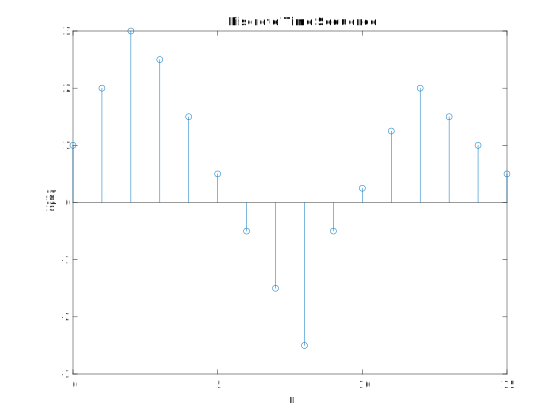

In [9]:
stem([0:15],xn),xlabel('n'),ylabel('x[n]'),title('Discrete Time Sequence')

In [10]:
Xm = dft(xn,16);

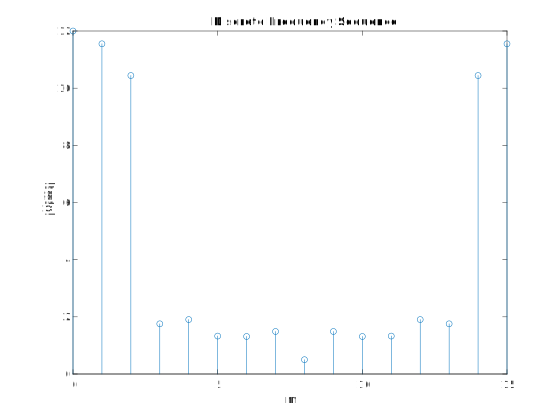

In [11]:
stem([0:15],abs(Xm)),xlabel('m'),ylabel('|X[m]|'),title('Discrete Frequency Sequence')

Points to note: 

* $X[0] = 12$ is the DC component of the DT sequence.
* After the $|X[8]| = 1.4872$ term, the magnitude of the frequency values for the range $9 <= m \le 15$ are the mirror image of the values for the range $0 <= m <= 7$.
* This is not a coincidence, in fact if $x[n]$ is an N-point *real discrete time function*, only $N/2$ of the *frequency components* of $|X[m]|$ *are unique*.

## Even and Odd Properties of the DFT

The discrete time and discrete frequency functions are defined as *even* or *odd* in according to the following relations:

Even time function: $f[N - n] = f[n]$

Odd time function: $f[N - n] = -f[n]$

Even frequency function: $F[N - m] = F[m]$

Odd frequency function: $F[N - m] = -F[m]$

Even and odd properties of the DFT

<table>
<thead>
<tr><td>Discrete time sequence $f[n]$ </td><td> Discrete frequency sequence $F[m]$ </td></tr>
</thead>
<tbody>
<tr>
    <td>Real</td><td>Complex<br>Real part is Even<br>Imaginary part is Odd</td>
</tr>
<tr>
    <td>Real and Even</td><td>Real and Even</td>
</tr>
<tr>
    <td>Real and Odd</td><td>Imaginary and Even</td>
</tr>
<tr>
    <td>Imaginary</td><td>Complex<br>Real part is Odd<br>Imaginary part is Even</td>
</tr>
<tr>
    <td>Imaginary and Even</td><td>Imaginary and Even</td>
</tr>
<tr>
    <td>Imaginary and Odd</td><td>Real and Odd</td>
</tr>
</tbody>
</table>

It is not difficult to prove these by expanding 

$$X[m] = \sum_{n=0}^{N-1} x[n]W_N^{mn}$$

into its real and imaginary parts using Euler's identity and considering the cosine (even) and sine (odd) terms that result.

## Common Properties and Theorems of the DFT

We denote the DFT and inverse DFT using as follows:

$$X[m] = \mathcal{D}\left\{x[n]\right\}$$

and

$$x[n] = \mathcal{D}^{-1}\left\{X[m]\right\}$$


We then state the following useful properties. For proofs, see Karris, 10.3. **Not examined.**

### Linearity

$$a x_1[n] + b x_2[n] + \cdots \Leftrightarrow a X_1[m] + b X_2[m] + \cdots$$

### Time-shift

$$x[n-k] \Leftrightarrow W_n^{km} X[m]$$

### Frequency shift

$$W_n^{-km} x[n] \Leftrightarrow X[m-k]$$

### Time convolution

$$x[n]*h[n] \Leftrightarrow X[m] H[m]$$

### Frequency convolution

$$x[n]y[n] \Leftrightarrow \frac{1}{N}\sum_{k=0}^{N-1} X[k] Y[m - k] \Leftrightarrow X[m] * Y[m]$$

## Sampling Theorem, Windows, and the Picket Fence Effect

See notes

### Sampling Theorem

The *sampling theorem* known as *Nyquist/Shannon's Sampling Theorem* (see [wp>Nyquist/Shannon Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)), states that *if a continuous time function, $f(t)$ is band-limited with its highest frequency component less that $W$, then $f(t)$ can be completely recovered from its sampled values, $f[n]$, f the sampling frequency is equal or greater than $2W$.

For example, say the highest frequency component in a signal is 18 kHz, this signal must be sampled at $2 \times 18 = 36$ kHz or higher so that it can be completely specified by its sampled values. If the sampled frequency remains the same, i.e., 36 kHz, and the highest frequency in the signal is increased, to say 25 kHz, this signal cannot be recovered by a Digital to Analogue Converter (DAC).

Since many real signals are not band limited, a typical digital signal processing system will include a low-pass filter, often called a *pre-sampling-filter* or simply a *pre-filter*, to ensure that the highest frequency signal allowed into the system will be equal or less than the sampling frequency so that the signal can be recovered. The highest frequency allowed in the system is referred to as the Nyquist frequency denoted as $f_n$.

If the signal is not band limited, or the sampling frequency is too low, the spectral components of the signal will overlap each other and this is called *aliasing*. To avoid aliasing, we must increase the sampling rate.

### Windowing

A DT signal may have an infinite length; in this case it must be limited to a finite interval before it is sampled. We can terminate the signal at a defined number of terms by multiplying it by a *window function*. There are several window functions that are used in practice such as the *rectangular*, *triangular*, *Hanning*, *Hamming*, *Kaiser*, etc. Window functions, and their design, are outside the scope of this module, but are discussed in Appendix E of Karris.

All I will say here is that the window function must be carefully chosen to avoid the signal being terminated too abrubtly and causing *leakage* -- that is a spread of the spectrum outside the bounds imposed by the window.

### Picket fence

A third problem introduced by the DFT is the fact that as the spectrum of the DFT is not continuous, important frequencies may fall between spectrum lines and therefore not be detected. This is called the picket fence effect, named after the white fences seen in the suburbs in US movies. A way round this is to pad the signal with zeros so that the effective period changes and therefore changes the locations of the spectral lines.

You should remember that the sampling theorem states under what conditions a signal may be recovered. It does not guarantee that all significant frequencies will be present in the sampled signal.

## A summary of the important features of sampling and the DFT

* $N$ is the number of samples in frequency.
* $f_s$ sampling frequency, samples per seconds.
* $T_t$ period of a periodic DT function.
* $t_s$ interval between the $N$ samples in time period $T_t$.
* $f_f$ period of a periodic DF function.
* $F_s$ interval between the $N$ samples in frequency period $T_f$.

The relationships between these quantities are:

$$t_t = \frac{T_t}{N}$$

$$f_s = \frac{1}{t_t}$$

$$t_f = \frac{T_f}{N}$$

$$t_t = \frac{1}{T_f}$$

$$f_f = \frac{1}{T_t}$$

We will add these quantities to the results of Example 4 in class.

### Example 4 (continued)

![Example 4](./pictures/repeat.png)

To reproduce this plot use [repeat.m](https://cpjobling.github.io/eg-247-textbook/dft/1/matlab/repeat.m).

### In Class Example 5

The period of a periodic DT function is 0.125 ms and it is sampled at 1024 equally spaced points. It is assumed that with this number of samples, the sampling theorem is satisfied and thus there will be no aliasing.

1. Compute the interval $t_t$ between samples for the periodic signal 
1. Compute the period $T_f$ of the frequency spectrum in kHz
2. Compute the interval $t_f$ between frequency components in kHz
3. Compute the sampling frequency $f_s$.
4. Compute the Nyquist frequency $f_n$.

### Solution

To be done in class.

*  Compute the interval $t_t$ between samples for the periodic signal 

<pre style="border: 2px solid blue">









</pre>

* Compute the period of the frequency spectrum $T_f$ in kHz

<pre style="border: 2px solid blue">









</pre>

* Compute the interval $t_f$ between frequency components in kHz

<pre style="border: 2px solid blue">









</pre>

* Compute the sampling frequency $f_s$.

<pre style="border: 2px solid blue">









</pre>

* Compute the Nyquist frequency $f_n$.

<pre style="border: 2px solid blue">









</pre>

## Summary

* The discrete time fourier transform
* Even and Odd Properties of the DFT
* Common Properties and Theorems of the DFT
* Sampling Theorem, Windows, and the Picket Fence Effect

*Next session*

* The [Fast Fourier Transform](../2/fft)

(without the mathematics)

## Homework

Try Exercise 1 and Exercise 2 in Karris 10.8 by hand.

For the exam, I wouldn't expect you to compute the whole sequence for a signal with more than 8 samples. A thorough understanding of the $W_N^nm$ notation is needed and familiarity with the angle wheel (e.g as for $W_8^n$ in Example 3) will be advantageous.

## References

See [Bibliography](/zbib).

## Answers to selcted exercises

### Example 1

$$\begin{eqnarray*}
  X(0) &=& 6 \\ 
  X(1) &=&  - 1 - j \\ 
  X(2) &=& 0 \\ 
  X(3) &=&  - 1 + j \\ 
\end{eqnarray*} $$


### Example 3

$$W_8 = \left[ 1, \frac{1}{\sqrt{2}}+j\frac{1}{\sqrt{2}}, j, -\frac{1}{\sqrt{2}}+j\frac{1}{\sqrt{2}}, -1, -\frac{1}{\sqrt{2}}-j\frac{1}{\sqrt{2}}, -j, \frac{1}{\sqrt{2}}-j\frac{1}{\sqrt{2}} \right]$$

### Example 5

1. $t_t = 0.122$ $\mu$s
2. $T_f = 1/t_t = 8192$ kHz (8.2 Mhz)
2. $t_f = T_f/N = 8$ kHz
3. $f_s = 1/t_t$ = 8.2 Mhz
4. $f_n \le F_s/2 \le 4.1$ Mhz